<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 // Bank Marketing Datasets</font></h1>

<h1 align=center><font size = 6>Has the Client Subscribe a Term Deposit?</font></h1>

## Data Preparation

Load the library you need.

Get your Bank Marketing Datasets at kode.id and load the dataframe to your notebook.

In [1]:
# import package

import math
import statistics
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats.distributions as dist

import random
import warnings
import statsmodels.api as sm
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits

from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, LabelEncoder


# import dataset
from sklearn.datasets import load_breast_cancer

# optional, untuk visualisasi decision tree
# install graphviz
# install pydotplus
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image


In [2]:
# Load dataset

df_client = pd.read_csv("dataset/bank-additional.csv", sep=";") # separator ; pada file asli
df_client

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [3]:
df_client.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

* age  : umur (int).
* job  : pekerjaan (string;categorical).
* marital  : marital status (string;categorical).
* education  : pendidikan (string;categorical).
* default  : status kepemilikan kredit (string;categorical).
* housing  : status kepemilikan pinjaman rumah (string;categorical).
* loan  : status kepemilikan pinjaman personal (string;categorical).
* contact  : kontak (string;categorical).
* month  : bulan terakhir dihubungi (string;categorical).
* day_of_week  : hari terakhir dihubungi (string;categorical).
* duration  : durasi komunikasi saat dihubungi (float).
* campaign  : jumlah kontak (int).
* pdays  : jumlah hari setelah klien dihubungi (int).
* previous  :jumlah klien dihubungi seelum kampanye ini (int).
* poutcome  : keberhasilan setelah kampanye (string;categorical).
* emp.var.rate  : ind. employment variation rate (float).
* cons.price.idx  : ind. consumer price index (float).
* cons.conf.idx  : ind. consumer confidence index (float).
* euribor3m  : ind. euribor 3 month rate (float).
* nr.employed  : ind. jumlah pekerja (int).
* y  : (string;categorical).

In [5]:
display(df_client[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']].head(3))
print()
display(df_client[['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays','previous']].head(3))
print()
display(df_client[['poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].head(3))

,age,job,marital,education,default,housing,loan
0,30,blue-collar,married,basic.9y,no,yes,no
1,39,services,single,high.school,no,no,no
2,25,services,married,high.school,no,yes,no


,contact,month,day_of_week,duration,campaign,pdays,previous
0,cellular,may,fri,487,2,999,0
1,telephone,may,fri,346,4,999,0
2,telephone,jun,wed,227,1,999,0


,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


Data Encoding

In [6]:
# listing categorical data

job = df_client['job'].to_numpy()
marital = df_client['marital'].to_numpy()
education = df_client['education'].to_numpy()
default = df_client['default'].to_numpy()
housing = df_client['housing'].to_numpy()
loan = df_client['loan'].to_numpy()
contact = df_client['contact'].to_numpy()
month = df_client['month'].to_numpy()
day_of_week = df_client['day_of_week'].to_numpy()
poutcome = df_client['poutcome'].to_numpy()
y = df_client['y'].to_numpy()


In [7]:
df_client = df_client[['age', 'duration', 'campaign', 'pdays','previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']]

In [8]:
# encode data to string

le = LabelEncoder()
job_en = le.fit_transform(job)
print(le.classes_)

le = LabelEncoder()
marital_en = le.fit_transform(marital)
print(le.classes_)

le = LabelEncoder()
education_en = le.fit_transform(education)
print(le.classes_)

le = LabelEncoder()
default_en = le.fit_transform(default)
print(le.classes_)

le = LabelEncoder()
housing_en = le.fit_transform(housing)
print(le.classes_)

le = LabelEncoder()
loan_en = le.fit_transform(loan)
print(le.classes_)

le = LabelEncoder()
contact_en = le.fit_transform(contact)
print(le.classes_)

le = LabelEncoder()
month_en = le.fit_transform(month)
print(le.classes_)

le = LabelEncoder()
day_of_week_en = le.fit_transform(day_of_week)
print(le.classes_)

le = LabelEncoder()
poutcome_en = le.fit_transform(poutcome)
print(le.classes_)

le = LabelEncoder()
y_en = le.fit_transform(y)
print(le.classes_)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single' 'unknown']
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['cellular' 'telephone']
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['fri' 'mon' 'thu' 'tue' 'wed']
['failure' 'nonexistent' 'success']
['no' 'yes']


In [9]:
df_ctgr = pd.DataFrame({'job':job_en,'marital':marital_en,'education':education_en,'default':default_en,'housing':housing_en,
                'loan':loan_en,'contact':contact_en,'month':month_en,'day_of_week':day_of_week_en,
                'poutcome':poutcome_en,'y':y_en})
df_ctgr

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,1,1,2,0,2,0,0,6,0,1,0
1,7,2,3,0,0,0,1,6,0,1,0
2,7,1,3,0,2,0,1,4,4,1,0
3,7,1,2,0,1,1,1,4,0,1,0
4,0,1,6,0,2,0,0,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4114,0,1,1,0,2,2,0,3,2,1,0
4115,0,1,3,0,2,0,1,3,0,1,0
4116,8,2,3,0,0,0,0,6,1,0,0
4117,0,1,3,0,0,0,0,1,0,1,0


In [10]:
df_client

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1


In [11]:
df_client[['job','marital','education','default','housing',
                'loan','contact','month','day_of_week',
                'poutcome','y']] = df_ctgr[['job','marital','education','default','housing',
                'loan','contact','month','day_of_week',
                'poutcome','y']]

df_client.head(3)

C:\Users\mindr\AppData\Local\Temp\ipykernel_17080\915879124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client[['job','marital','education','default','housing',
C:\Users\mindr\AppData\Local\Temp\ipykernel_17080\915879124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client[['job','marital','education','default','housing',
C:\Users\mindr\AppData\Local\Temp\ipykernel_17080\915879124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,2,0,2,0,0,6,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,2,3,0,0,0,1,6,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,1,3,0,2,0,1,4,4,1,0


In [12]:
pd.DataFrame({'min':df_client.min(), 'mean':df_client.mean(),'max':df_client.max(),})

,min,mean,max
age,18.000,40.113620,88.000
duration,0.000,256.788055,3643.000
campaign,1.000,2.537266,35.000
pdays,0.000,960.422190,999.000
previous,0.000,0.190337,6.000
emp.var.rate,-3.400,0.084972,1.400
cons.price.idx,92.201,93.579704,94.767
cons.conf.idx,-50.800,-40.499102,-26.900
euribor3m,0.635,3.621356,5.045
nr.employed,4963.600,5166.481695,5228.100


## Logistic Regression

Membuat Model

In [13]:
# Target : y
# feature : !=y

features = df_client.drop(columns=["y"])
target = df_client["y"]

In [14]:
# buat model
model_lr = LogisticRegression()

Melatih Model

In [15]:
# latih model

model_lr.fit(features, target)

c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluasi Model

In [16]:
# tentukan y prediksi
y_pred = model_lr.predict(features)

# keakuratan
print("Accuracy")
print(classification_report(target,y_pred))

Accuracy
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3668
           1       0.67      0.42      0.52       451

    accuracy                           0.91      4119
   macro avg       0.80      0.70      0.73      4119
weighted avg       0.90      0.91      0.90      4119



Akurasi : `91%` untuk memprediksi apakah klien sudah subscribe term deposit.

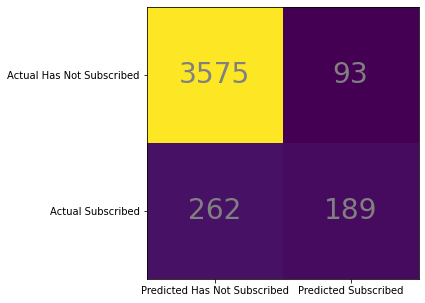

In [17]:
cm_lr = confusion_matrix(target, y_pred)

# visualisasi confusion matrix

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm_lr)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Has Not Subscribed', 'Predicted Subscribed'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Has Not Subscribed', 'Actual Subscribed'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_lr[i, j], ha='center', va='center', color='grey', fontsize=28)
plt.show()

Keakuratan model `logistic regression` untuk case ini yang didapatkan dari confussion matriks adalah terdapat 3574 data yang diprediksi `no` benar, namun hanya terdapat 190 data yang diprediksi `yes` salah. Hanya kita bisa melihat perbandingan antara prediksi benar dan salah pada masing-masing yes dan no. Yang benar diprediksi masih lebih besar akurasinya.

## Prediksi

* ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
* ['divorced' 'married' 'single' 'unknown']
* ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
* ['no' 'unknown' 'yes']
* ['no' 'unknown' 'yes']
* ['no' 'unknown' 'yes']
* ['cellular' 'telephone']
* ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
* ['fri' 'mon' 'thu' 'tue' 'wed']
* ['failure' 'nonexistent' 'success']
* ['no' 'yes']

In [18]:
'''
Kondisi klien yang akan diprediksi
age = 27
duration = 535
campaign = 8
pdays = 360
previous = 18
emp.var.rate = 1
cons.price.idx = 93.5
cons.conf.idx = -22.4
euribor3m = 3.5
nr.employed = 5300
job = student : 8
marital = married : 1
education = university.degree : 6
default = yes : 2
housing = no : 0
loan = yes : 2
contact = cellular : 0
month = jul : 3
day_of_week = thu : 2
poutcome = nonexistent : 1
'''

client = [[27, 535, 8, 360, 18, 1, 93.5, -22.4, 3.5, 5300, 8, 1, 6, 2, 0, 2, 0, 3, 2, 1]]
model_lr.predict(client)

c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

`Client Has not Subscribed a Term Deposite.`

## K-Nearest Neighbor

Data Preparation

In [19]:
df_client

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,2,0,2,0,0,6,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,2,3,0,0,0,1,6,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,1,3,0,2,0,1,4,4,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,1,2,0,1,1,1,4,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,1,6,0,2,0,0,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,1,1,0,2,2,0,3,2,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,1,3,0,2,0,1,3,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,2,3,0,0,0,0,6,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,1,3,0,0,0,0,1,0,1,0


In [20]:
features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,1,1,2,0,2,0,0,6,0,1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,7,2,3,0,0,0,1,6,0,1
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,7,1,3,0,2,0,1,4,4,1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,7,1,2,0,1,1,1,4,0,1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,6,0,2,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,0,1,1,0,2,2,0,3,2,1
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,0,1,3,0,2,0,1,3,0,1
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,8,2,3,0,0,0,0,6,1,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,0,1,3,0,0,0,0,1,0,1


In [21]:
target

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int32

Buat dan Latih Model

In [22]:
# maks neighbors (k) yang digunakan untuk memprediksi 
n = int((len(df_client)-119)*0.003)
n


12

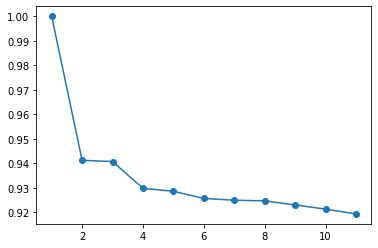

In [23]:
# k yang ditetapkan untuk membantu memprediksi akan dilihat yang paling akurat

i = range(1,n)

scores = []
for k in i:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(features, target)

    y_pred = model_knn.predict(features)

    scores.append(accuracy_score(target, y_pred))

plt.plot(i, scores, marker="o")

Terlihat pada grafik di atas bahwa semakin banyak k yang dipilih maka akurasi prediksi menurun. Akan diambil k=2 untuk model.

In [24]:
k=2

# buat modet
model_knn = KNeighborsClassifier(n_neighbors=k)

# latih model
model_knn.fit(features, target)

KNeighborsClassifier(n_neighbors=2)

Evaluasi Model

In [25]:
y_pred = model_knn.predict(features)
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3668
           1       1.00      0.46      0.63       451

    accuracy                           0.94      4119
   macro avg       0.97      0.73      0.80      4119
weighted avg       0.94      0.94      0.93      4119



Akurasi : `94%` untuk memprediksi apakah klien sudah subscribe term deposit.

Skor Akurasi Model =  0.941247875697985


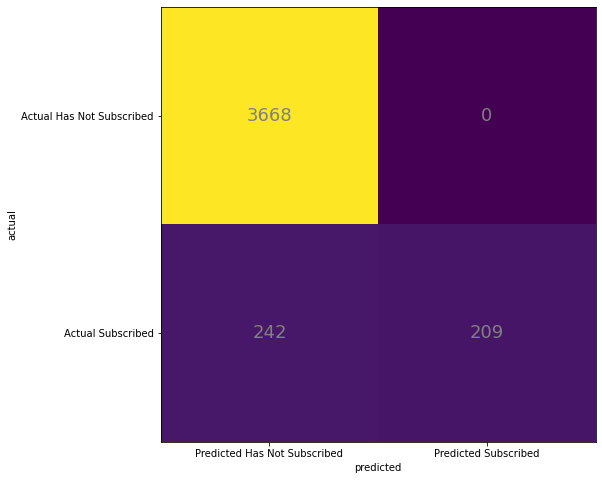

In [26]:
print("Skor Akurasi Model = ",accuracy_score(target, y_pred))

cm = confusion_matrix(target, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Has Not Subscribed', 'Predicted Subscribed'))
ax.set_xlabel("predicted")
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Has Not Subscribed', 'Actual Subscribed'))
ax.set_ylabel("actual")
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='grey', fontsize=18)
plt.show()


Keakuratan model `KNN` untuk case ini yang didapatkan dari confussion matriks adalah terdapat 3578 data yang diprediksi `no` benar, namun hanya terdapat 297 data yang diprediksi `yes` salah. Hanya kita bisa melihat perbandingan antara prediksi benar dan salah pada masing-masing yes dan no. Yang benar diprediksi masih lebih besar akurasinya.

Prediksi dengan Model

In [27]:
pd.DataFrame({'min':df_client.min(), 'mean':df_client.mean(),'max':df_client.max(),})

,min,mean,max
age,18.000,40.113620,88.000
duration,0.000,256.788055,3643.000
campaign,1.000,2.537266,35.000
pdays,0.000,960.422190,999.000
previous,0.000,0.190337,6.000
emp.var.rate,-3.400,0.084972,1.400
cons.price.idx,92.201,93.579704,94.767
cons.conf.idx,-50.800,-40.499102,-26.900
euribor3m,0.635,3.621356,5.045
nr.employed,4963.600,5166.481695,5228.100


In [28]:
'''
Kondisi klien yang akan diprediksi
age = 40
duration = 250
campaign = 2
pdays = 960
previous = 18
emp.var.rate = 1
cons.price.idx = 93.5
cons.conf.idx = -22.4
euribor3m = 3.5
nr.employed = 5100
job = student : 8
marital = married : 1
education = university.degree : 6
default = yes : 2
housing = no : 0
loan = yes : 2
contact = cellular : 0
month = jul : 3
day_of_week = thu : 2
poutcome = nonexistent : 1
'''

client = [[40, 250, 2, 960, 18, 1, 93.5, -22.4, 3.5, 5100, 8, 1, 6, 2, 0, 2, 0, 3, 2, 1]]

predict = model_knn.predict(client)
print(predict)

[0]


c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


`Client Has not Subscribed a Term Deposite.`

## Naive Bayes

Metode klasifikasi dimana setiap fitur dianggap terpisah, tidak saling mempengaruhi satu sama lain.

Data Preparation

In [29]:
df_client

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,2,0,2,0,0,6,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,2,3,0,0,0,1,6,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,1,3,0,2,0,1,4,4,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,1,2,0,1,1,1,4,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,1,6,0,2,0,0,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,1,1,0,2,2,0,3,2,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,1,3,0,2,0,1,3,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,2,3,0,0,0,0,6,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,1,3,0,0,0,0,1,0,1,0


In [30]:
features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,1,1,2,0,2,0,0,6,0,1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,7,2,3,0,0,0,1,6,0,1
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,7,1,3,0,2,0,1,4,4,1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,7,1,2,0,1,1,1,4,0,1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,6,0,2,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,0,1,1,0,2,2,0,3,2,1
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,0,1,3,0,2,0,1,3,0,1
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,8,2,3,0,0,0,0,6,1,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,0,1,3,0,0,0,0,1,0,1


In [31]:
target

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int32

Membuat Model

In [32]:
model_nb = GaussianNB()

Melatih Model

In [33]:
model_nb.fit(features, target)


GaussianNB()

Evaluasi Model

In [34]:
# evaluasi keakuratan model

y_pred = model_nb.predict(features)

print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3668
           1       0.38      0.61      0.47       451

    accuracy                           0.85      4119
   macro avg       0.67      0.74      0.69      4119
weighted avg       0.89      0.85      0.86      4119



Akurasi : `85%` untuk memprediksi apakah klien sudah subscribe term deposit.

Skor Akurasi Model =  0.84947802864773


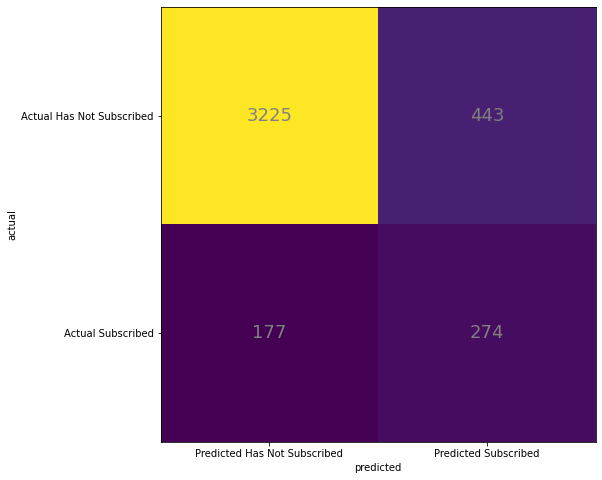

In [35]:
print("Skor Akurasi Model = ",accuracy_score(target, y_pred))
cm = confusion_matrix(target, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Has Not Subscribed', 'Predicted Subscribed'))
ax.set_xlabel("predicted")
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Has Not Subscribed', 'Actual Subscribed'))
ax.set_ylabel("actual")
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='grey', fontsize=18)
plt.show()

Keakuratan model `Naive Bayes` untuk case ini yang didapatkan dari confussion matriks adalah terdapat 3225 data yang diprediksi `no` benar, namun hanya terdapat 274 data yang diprediksi `yes` salah. Hanya kita bisa melihat perbandingan antara prediksi benar dan salah pada masing-masing yes dan no. Yang benar diprediksi masih lebih besar akurasinya.

Prediksi dengan Model

In [36]:
'''
Kondisi klien yang akan diprediksi
age = 40
duration = 250
campaign = 2
pdays = 960
previous = 18
emp.var.rate = 1
cons.price.idx = 93.5
cons.conf.idx = -22.4
euribor3m = 3.5
nr.employed = 5100
job = student : 8
marital = married : 1
education = university.degree : 6
default = yes : 2
housing = no : 0
loan = yes : 2
contact = cellular : 0
month = jul : 3
day_of_week = thu : 2
poutcome = nonexistent : 1
'''

client = [[40, 250, 2, 960, 18, 1, 93.5, -22.4, 3.5, 5100, 8, 1, 6, 2, 0, 2, 0, 3, 2, 1]]

predict = model_nb.predict(client)
print(predict)

[1]


c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


`Client Has not Subscribed a Term Deposite.`
* Perbedaan hasil prediksi klien yang sama dengan model KNN sebelumnya kemungkinan dikarenakan asumsi fitur dianggap terpisah, tidak saling mempengaruhi satu sama lain.

## Decision Tree

Data Preparation

In [37]:
print('Feature')
display(features)
print('Target')
display(target)

Feature


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,1,1,2,0,2,0,0,6,0,1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,7,2,3,0,0,0,1,6,0,1
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,7,1,3,0,2,0,1,4,4,1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,7,1,2,0,1,1,1,4,0,1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,6,0,2,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,0,1,1,0,2,2,0,3,2,1
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,0,1,3,0,2,0,1,3,0,1
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,8,2,3,0,0,0,0,6,1,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,0,1,3,0,0,0,0,1,0,1


Target


0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int32

Membuat Model

In [38]:
model_dt = DecisionTreeClassifier()

Melatih Model

In [39]:
model_dt.fit(features, target)

DecisionTreeClassifier()

Evaluasi Model

In [40]:
y_pred = model_dt.predict(features)
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3668
           1       1.00      1.00      1.00       451

    accuracy                           1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119



In [41]:
features.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [45]:
# optional - visualisasi decision tree

dot_data = StringIO()
tree.export_graphviz(model_dt, 
 out_file=dot_data, 
 class_names=['No','Yes'], # the target names.
 feature_names=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'], # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_jpg())

InvocationException: Program terminated with status: 1. stderr follows: Format: "jpg" not recognized. Use one of:


Prediksi

In [43]:
'''
Kondisi klien yang akan diprediksi
age = 40
duration = 250
campaign = 2
pdays = 960
previous = 18
emp.var.rate = 1
cons.price.idx = 93.5
cons.conf.idx = -22.4
euribor3m = 3.5
nr.employed = 5100
job = student : 8
marital = married : 1
education = university.degree : 6
default = yes : 2
housing = no : 0
loan = yes : 2
contact = cellular : 0
month = jul : 3
day_of_week = thu : 2
poutcome = nonexistent : 1
'''

client = [[40, 250, 2, 960, 18, 1, 93.5, -22.4, 3.5, 5100, 8, 1, 6, 2, 0, 2, 0, 3, 2, 1]]

predict = model_dt.predict(client)
print(predict)

[0]


c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
